In [1]:
import wandb
import pandas as pd
import netrc
import matplotlib.pyplot as plt

In [2]:
wandb.login()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ryanzhangofficial (ryzhangofficial). Use `wandb login --relogin` to force relogin


True

In [3]:
import os
import json
import glob

def load_all_json_files():
    # Initialize an empty dictionary to store the contents of all JSON files
    combined_data = {}

    # Find all JSON files with the naming pattern: fasttext_wmt14_results_V{V value}_h{h tilde value}
    files = glob.glob('./experiments/fasttext/fasttext_wmt14_results_V*_h*.json')

    # Iterate over each file
    for fname in files:
        # Extract the V and h_tilde values from the filename
        V_value = fname.split('_V')[1].split('_h')[0]
        h_tilde_value = fname.split('_h')[1].replace('.json', '')

        # Load the contents of the JSON file
        with open(fname, 'r') as f:
            data = json.load(f)
        
        # Store the contents in the combined_data dictionary using the V and h_tilde as keys
        if V_value not in combined_data:
            combined_data[V_value] = {}
        
        combined_data[V_value][h_tilde_value] = data
    
    return combined_data

def save_combined_json(combined_data, output_file):
    # Save the combined data as a single JSON file
    with open(output_file, 'w') as f:
        json.dump(combined_data, f, indent=4)

# Load all the JSON files into a combined dictionary
combined_data = load_all_json_files()

# Save the combined dictionary to a new JSON file
output_file = 'combined_fasttext_wmt14_results.json'
save_combined_json(combined_data, output_file)

print(f"All JSON files have been combined and saved to {output_file}.")

All JSON files have been combined and saved to combined_fasttext_wmt14_results.json.


In [4]:
def download_data_from_wandb(entity: str, project: str, keywords: list):
    api_key = netrc.netrc().authenticators(host="api.wandb.ai")[2]
    api = wandb.Api(api_key=api_key, timeout=1800)
    runs = api.runs(path=f"{entity}/{project}")
    df = pd.DataFrame()

    if type(keywords) == str:
        keywords = [f"{keywords}", ]

    for run in runs:
        # We are only interested in 2 sorts of logs: server logs, and baseline logs
        for keyword in keywords:

            if type(keyword) != str:
                continue

            if keyword in run.name:
                run_scan = api.run(f"{entity}/{project}/{run.id}")
                rows = run_scan.scan_history()
                rows_pd = pd.DataFrame(rows)
                rows_pd["name"] = run.name
                rows_pd["id"] = run.id
                df = pd.concat([df, rows_pd])

    return df

In [5]:
def total_power(df, run_names):
    plt.figure(figsize=(10, 6))
    
    for run_name in run_names:
        run_df = df[df['name'] == run_name]
        plt.plot(run_df['_step'], run_df['power/total'], label=run_name)
    
    plt.xlabel('Step')
    plt.ylabel('Power (Total)')
    plt.title('Power Consumption (Total) for Different Runs')
    plt.legend(title='Runs')
    plt.grid(True)
    
    plt.show()

In [6]:
def power_run(df, run_names, total_power, average_power, num_samples):
    for run_name in run_names:
        run_df = df[df['name'] == run_name]
        total_power_used = run_df['power/total'].sum() / 1000
        total_power.append(total_power_used)
        average_power_used = total_power_used / num_samples
        average_power.append(average_power_used)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax1.bar(run_names, total_power)
    ax1.set_xlabel('Run Name')
    ax1.set_ylabel('Total Power Used (Watts)')
    ax1.set_title('Total Power Used for Each Run')
    ax1.set_xticklabels(run_names, rotation=45)
    
    ax2.bar(run_names, average_power)
    ax2.set_xlabel('Run Name')
    ax2.set_ylabel('Average Power Used per Sample (Watts)')
    ax2.set_title('Average Power Used per Sample for Each Run')
    ax2.set_xticklabels(run_names, rotation=45)
    
    plt.tight_layout()
    plt.show()

    return average_power

In [ ]:
entity = "ryzhangofficial"
project = "classifier"
keywords = ["13b", "7b", "tiny"]

df = download_data_from_wandb(entity, project, keywords)

In [ ]:
print("-------------------------------------------------------")
print(df.shape)
print("-------------------------------------------------------")
print(df.columns)
print("-------------------------------------------------------")
print(df.dtypes)
print("-------------------------------------------------------")
print(df.head())
print("-------------------------------------------------------")
print(df.info())
print("-------------------------------------------------------")
print(df.describe())

In [47]:
print(df['name'].unique()) 
print(df['id'].unique())

['wmt14_results_V0.01_h0.5' 'wmt14_results_V0.1_h0.5'
 'wmt14_results_V1_h0.5' 'wmt14_results_V10_h0.5'
 'wmt14_results_V100_h0.5' 'wmt14_results_V1000_h0.5'
 'wmt14_results_V10000_h0.5' 'wmt14_results_V100000_h0.5'
 'fasttext_wmt14_results_V0.01_h0.5' 'fasttext_wmt14_results_V0.1_h0.5'
 'fasttext_wmt14_results_V1_h0.5' 'fasttext_wmt14_results_V10_h0.5'
 'fasttext_wmt14_results_V100_h0.5' 'fasttext_wmt14_results_V1000_h0.5'
 'fasttext_wmt14_results_V10000_h0.5'
 'fasttext_wmt14_results_V100000_h0.5'
 'fasttext_wmt14_results_V0.01_h0.55' 'fasttext_wmt14_results_V0.1_h0.55'
 'fasttext_wmt14_results_V1_h0.55' 'fasttext_wmt14_results_V10_h0.55'
 'fasttext_wmt14_results_V100_h0.55' 'fasttext_wmt14_results_V1000_h0.55'
 'fasttext_wmt14_results_V10000_h0.55'
 'fasttext_wmt14_results_V100000_h0.55'
 'fasttext_wmt14_results_V0.01_h0.51'
 'fasttext_cnn_dailymail_results_V0.01_h0.3125'
 'fasttext_wmt14_results_V0.1_h0.51'
 'fasttext_cnn_dailymail_results_V0.1_h0.3125'
 'fasttext_wmt14_results_V1_

In [9]:
run_names = ['wmt14-tiny', 'wmt14-7b', 'wmt14-13b']

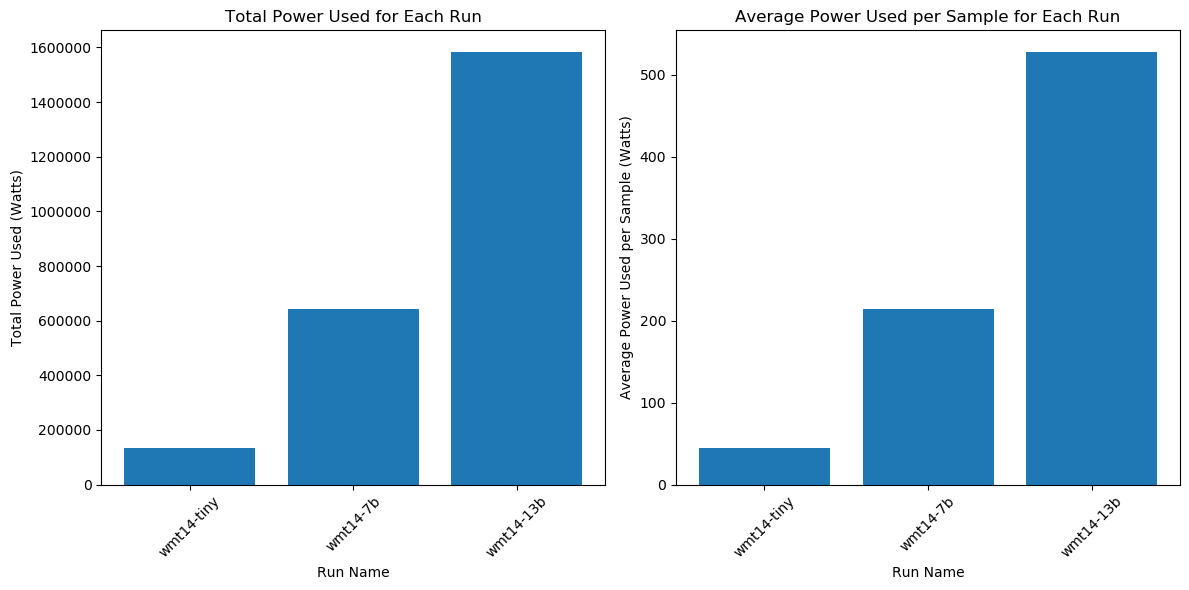

[44.63870933333333, 213.847874, 527.8699336666666]

In [10]:
total_power = []
average_power = []
num_samples = 3000

power_run(df, run_names, total_power, average_power, num_samples)

In [48]:
run_names = ['cnndailymail-tiny', 'cnndailymail-7b', 'cnndailymail-13b']

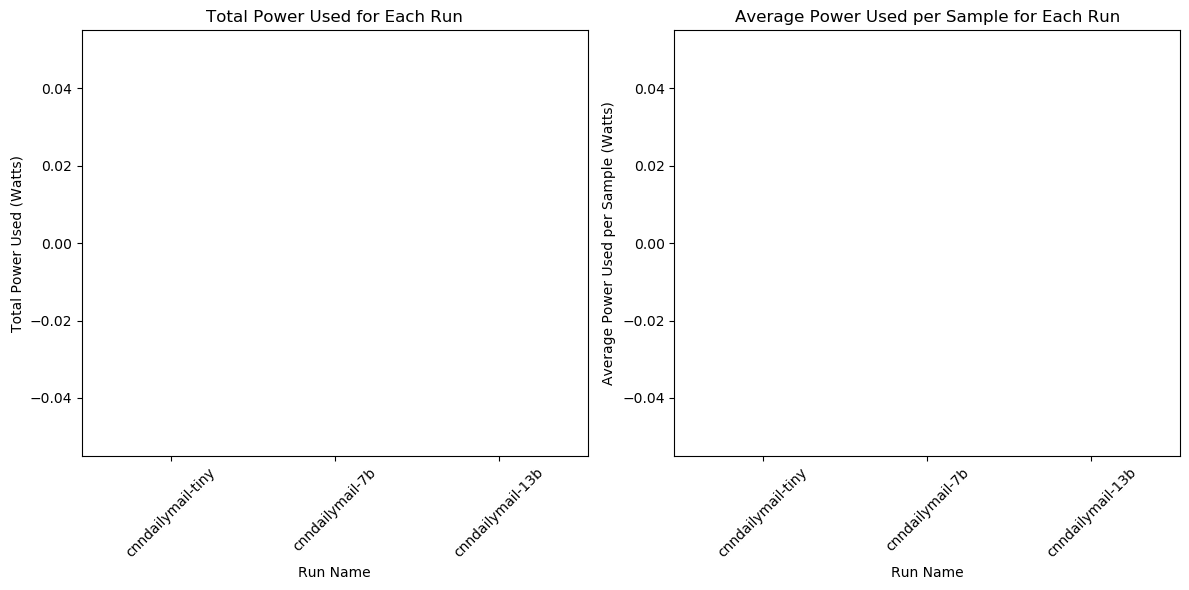

[0.0, 0.0, 0.0]

In [49]:
total_power = []
average_power = []
num_samples = 3000

power_run(df, run_names, total_power, average_power, num_samples)

In [6]:
entity = "ryzhangofficial"
project = "classifier"
keywords = ["fasttext"]

df_fasttext = download_data_from_wandb(entity, project, keywords)

/tmp/ipykernel_1662511/1473148140.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([df, rows_pd])


In [7]:
print("-------------------------------------------------------")
print(df_fasttext.shape)
print("-------------------------------------------------------")
print(df_fasttext.columns)
print("-------------------------------------------------------")
print(df_fasttext.dtypes)
print("-------------------------------------------------------")
print(df_fasttext.head())
print("-------------------------------------------------------")
print(df_fasttext.info())
print("-------------------------------------------------------")
print(df_fasttext.describe())

-------------------------------------------------------
(95367, 45)
-------------------------------------------------------
Index(['_runtime', '_step', '_timestamp',
       'bandwidth/disk_read_sys_bandwidth_mbs',
       'bandwidth/disk_write_sys_bandwidth_mbs',
       'bandwidth/net_recv_sys_bandwidth_mbs',
       'bandwidth/net_sent_sys_bandwidth_mbs', 'chosen_model_accuracy',
       'cpu/interrupts/global_ctx_switches_count',
       'cpu/interrupts/global_interrupts_count',
       'cpu/interrupts/global_soft_interrupts_count',
       'cpu/load/avg_sys_load_fifteen_min_percent',
       'cpu/load/avg_sys_load_five_min_percent',
       'cpu/load/avg_sys_load_one_min_percent',
       'disk/counter/disk_read_sys_count', 'disk/counter/disk_write_sys_count',
       'disk/disk_read_sys_mb', 'disk/disk_write_sys_mb',
       'disk/time/disk_busy_time_sys_s', 'disk/time/disk_read_time_sys_s',
       'disk/time/disk_write_time_sys_s', 'id', 'iteration', 'l_acc', 'l_loss',
       'memory/availab

In [8]:
print(df_fasttext['name'].unique()) 
print(df_fasttext['id'].unique())

['fasttext-wmt14-c5' 'fasttext-wmt14-c3' 'fasttext-wmt14-c1'
 'V100-fasttext-wmt14-h25' 'V100-fasttext-wmt14-h3'
 'V100-fasttext-wmt14-h35' 'V1000-fasttext-wmt14-h25'
 'V10000-fasttext-wmt14-h1' 'V100000-fasttext-wmt14-h1'
 'V1000000-fasttext-wmt14-h1' 'V10000000-fasttext-wmt14-h1'
 'actual-V1fasttext-wmt14-h1.json' 'actual-V10fasttext-wmt14-h1.json'
 'actual-V100fasttext-wmt14-h1.json' 'actual-V1000fasttext-wmt14-h1.json'
 'actual-V1fasttext-wmt14-h3.json' 'actual-V10fasttext-wmt14-h3.json'
 'actual-V100fasttext-wmt14-h3.json' 'actual-V1000fasttext-wmt14-h3.json'
 'actual-V1fasttext-wmt14-h5.json' 'actual-V10fasttext-wmt14-h5.json'
 'actual-V100fasttext-wmt14-h5.json' 'actual-V1000fasttext-wmt14-h5.json']
['yryjji3p' 'efbonu98' '8xa9d9mo' 'xq2y5yx5' 'c45jtjyu' 'b319ea1l'
 '69ujbi6q' 'xzz2hg82' 'psk1s2ng' 'yu2eg8vt' 'wukzpuos' '6okolpom'
 'vnx4tf7n' 'lrcww93q' 'i3dedjsn' 'cf2q0ke6' 'hy15290a' 'emydtqw8'
 'ladspszg' 'f3kw0cmw' '1o12yoad' 'ldylaxhj' 'so7dp82f']


In [26]:
run_names = ['V100-fasttext-wmt14-h25', 'V100-fasttext-wmt14-h3',
             'V100-fasttext-wmt14-h35', 'V1000-fasttext-wmt14-h25',
             'V10000-fasttext-wmt14-h1', 'V100000-fasttext-wmt14-h1',
             'V1000000-fasttext-wmt14-h1', 'V10000000-fasttext-wmt14-h1']

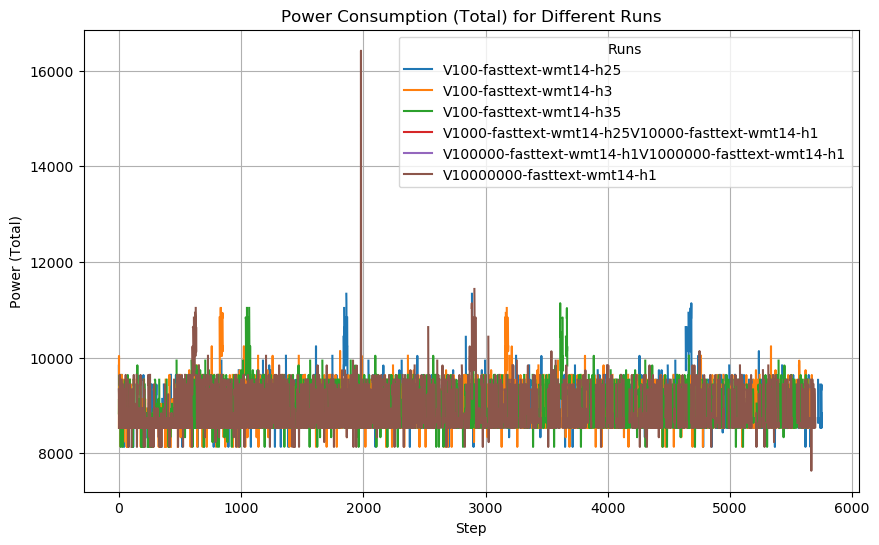

In [10]:
total_power(df_fasttext, run_names)

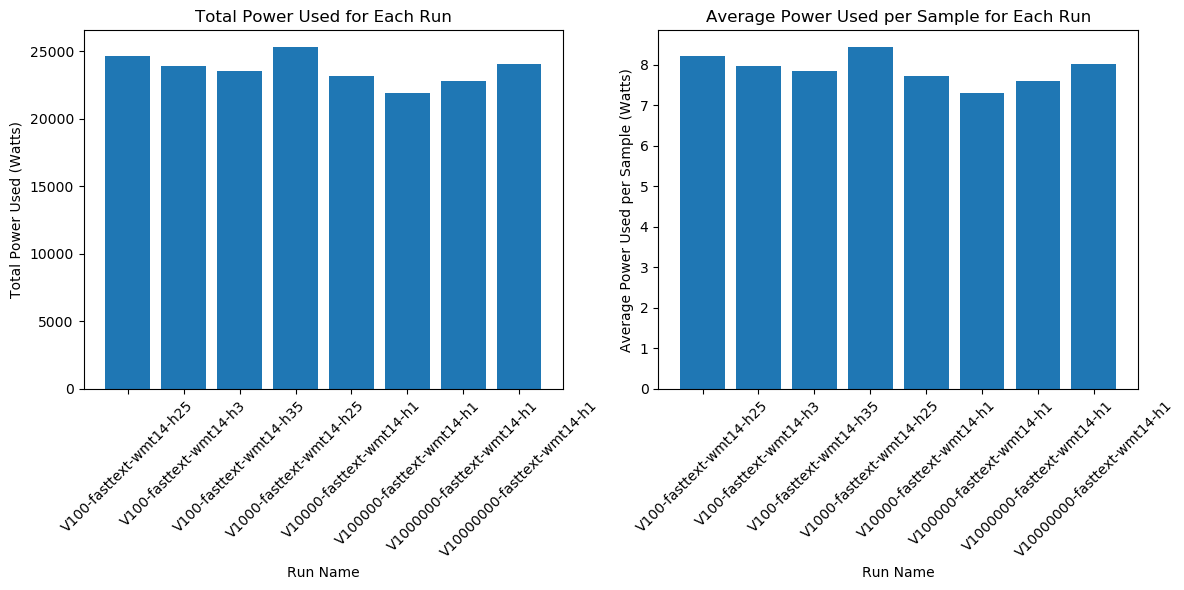

In [30]:
total_power = []
average_power = []
num_samples = 3000

power_run(df_fasttext, run_names, total_power, average_power, num_samples)

In [20]:
df_fasttext['chosen_model_accuracy']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2998    0.165092
2999    0.165726
3000    0.162286
3001    0.160371
3002         NaN
Name: chosen_model_accuracy, Length: 95367, dtype: float64

In [11]:
import pickle
import pandas as pd

with open('data/input_output_train', 'rb') as file:
    combined_outputs = pickle.load(file)

df_combined_outputs = pd.DataFrame(combined_outputs)
df_combined_outputs.head()

,wmt14,cnn_dailymail,gsm8k
0,{'input_text': 'Gutach: Noch mehr Sicherheit f...,{'input_text': '(CNN)The Palestinian Authority...,"{'input_text': None, '7b': None, 'tiny': None,..."
1,{'input_text': 'Sie stehen keine 100 Meter von...,{'input_text': '(CNN)Never mind cats having ni...,"{'input_text': None, '7b': None, 'tiny': None,..."
2,{'input_text': 'Zwei Anlagen so nah beieinande...,{'input_text': '(CNN)If you've been following ...,"{'input_text': None, '7b': None, 'tiny': None,..."
3,{'input_text': 'Diese Frage hat Gutachs Bürger...,{'input_text': '(CNN)Five Americans who were m...,"{'input_text': None, '7b': None, 'tiny': None,..."
4,"{'input_text': '""Die Rathausampel ist damals i...",{'input_text': '(CNN)A Duke student has admitt...,"{'input_text': None, '7b': None, 'tiny': None,..."


In [14]:
import os
import json

directory = 'experiments/fasttext'

for filename in os.listdir(directory):
    if filename.endswith('.json'): 
        filepath = os.path.join(directory, filename)
        
        with open(filepath, 'r') as f:
            data = json.load(f)

        total = 0
        num_results = len(data)
        
        for result in data:
            total += result['chosen_model_accuracy']
        
        avg_accuracy = total / num_results if num_results > 0 else 0
        print(f"{filename}: {avg_accuracy}")

actual-V1000-fasttext-wmt14-h05.json: 0.18898695987501102
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_87406/3909840423.py", line 17, in <module>
    total += result['chosen_model_accuracy']
KeyError: 'chosen_model_accuracy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1396, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1287, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/home/ubuntu/.local/lib/python3.8/site-packages

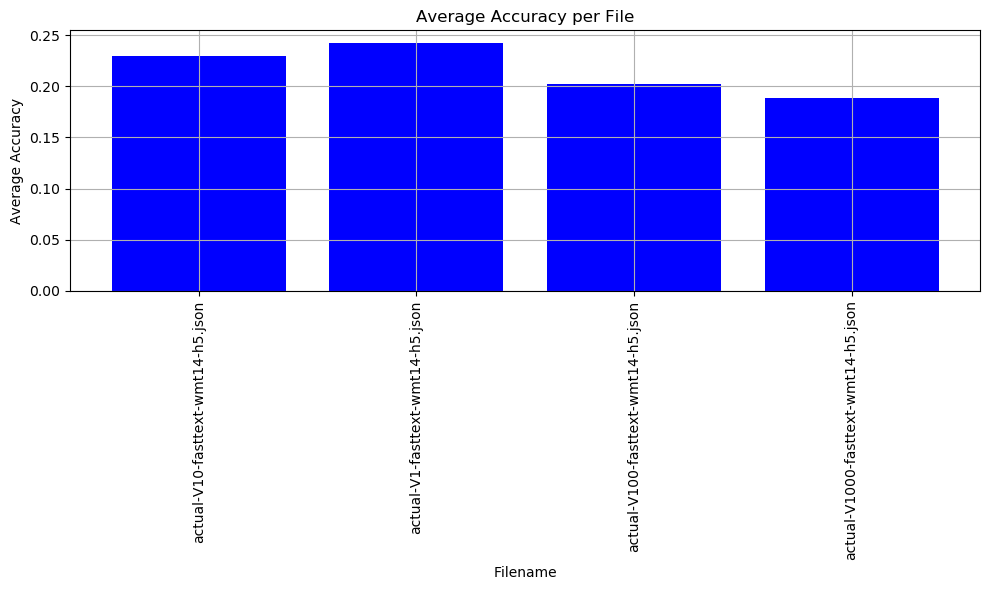

In [24]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

directory = 'experiments/fasttext'
file_averages = []
file_names = []

for filename in os.listdir(directory):
    if filename.endswith('.json') and "h5" in filename:
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as f:
            data = json.load(f)
            accuracies = [result['chosen_model_accuracy'] for result in data]
            avg_accuracy = np.mean(accuracies)
            file_averages.append(avg_accuracy)
            file_names.append(filename)

plt.figure(figsize=(10, 6))
plt.bar(file_names, file_averages, color='b')
plt.title('Average Accuracy per File')
plt.xlabel('Filename')
plt.ylabel('Average Accuracy')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
entity = "ryzhangofficial"
project = "classifier"
keywords = ["wmt14-13b", "wmt14-7b" "wmt14-tiny"]

df = download_data_from_wandb(entity, project, keywords)

In [7]:
run_names = ['wmt14-13b', 'wmt14-7b', 'wmt14-tiny']

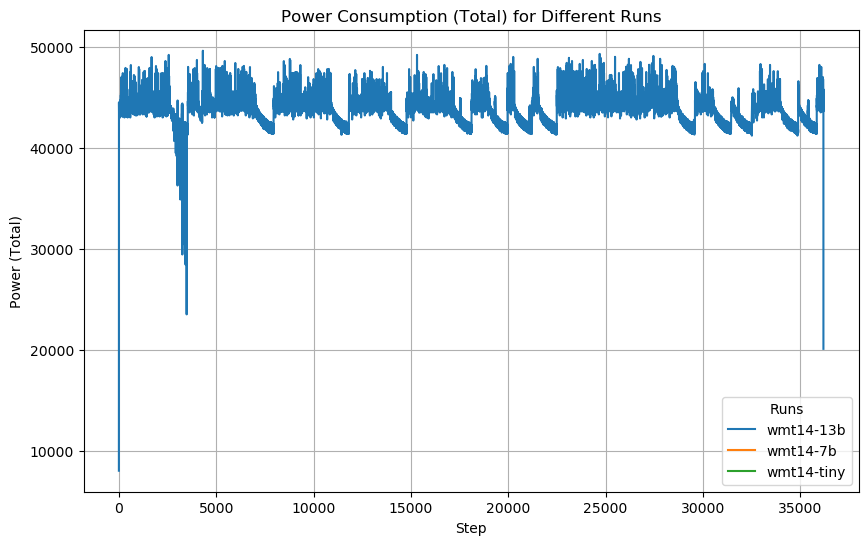

In [8]:
total_power(df, run_names)

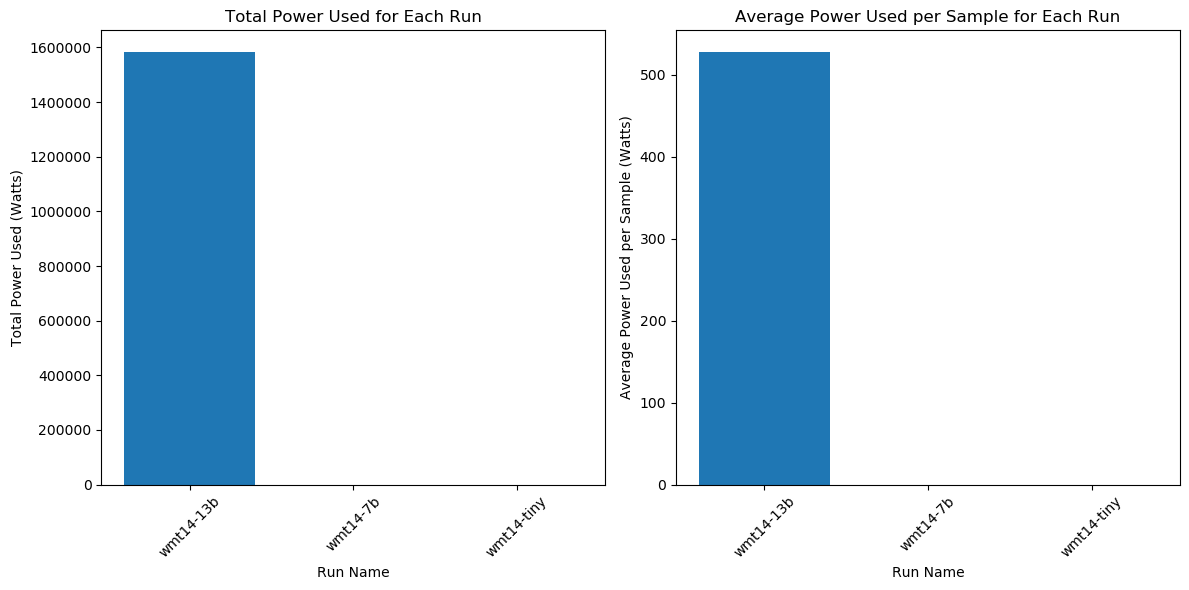

[527.8699336666666, 0.0, 0.0]


In [9]:
total_power = []
average_power = []
num_samples = 3000

avg_power = power_run(df, run_names, total_power, average_power, num_samples)
print(avg_power)

In [7]:
entity = "ryzhangofficial"
project = "classifier"
run_names = ["cnndailymail-tiny", "cnndailymail-7b", "cnndailymail-13b"]

df = download_data_from_wandb(entity, project, run_names)

/tmp/ipykernel_2468925/1473148140.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([df, rows_pd])


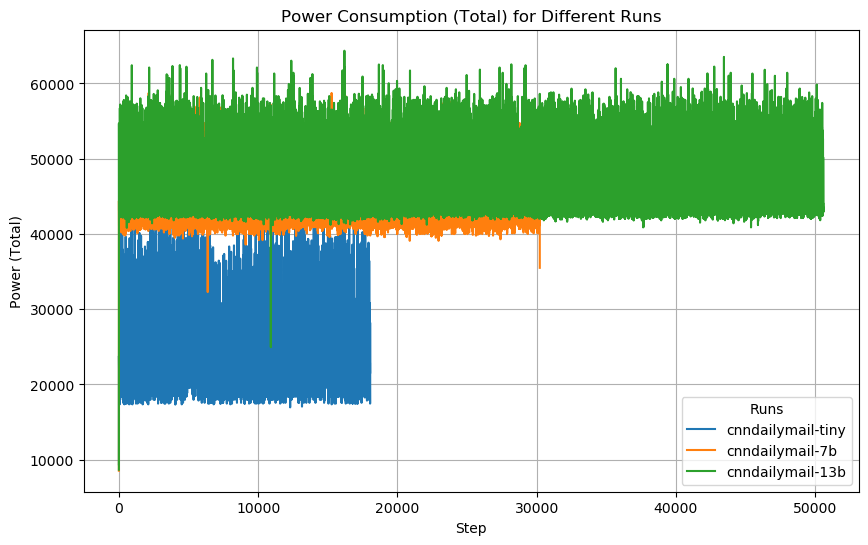

In [8]:
total_power(df, run_names)

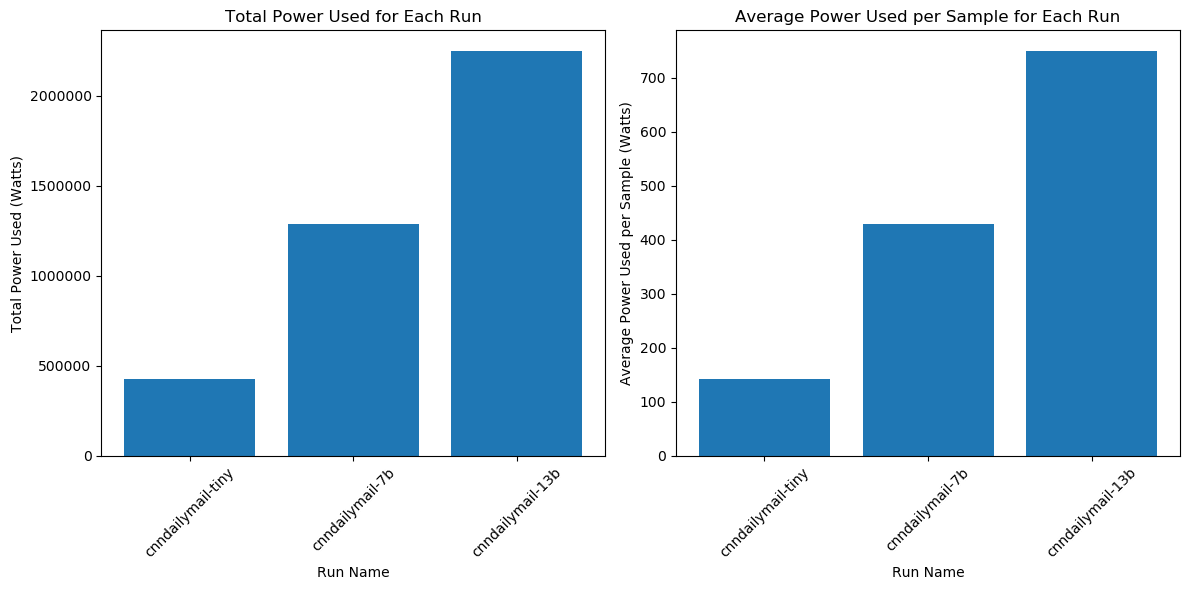

[142.08939366666667, 428.59089700000004, 750.2854566666667]


In [9]:
total_power = []
average_power = []
num_samples = 3000

avg_power = power_run(df, run_names, total_power, average_power, num_samples)
print(avg_power)

In [1]:
entity = "ryzhangofficial"
project = "classifier"
keywords = ["0.5", ".3125"]

df = download_data_from_wandb(entity, project, keywords)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_2463854/1091440962.py", line 5, in <module>
    df = download_data_from_wandb(entity, project, keywords)
NameError: name 'download_data_from_wandb' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1396, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1287, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/home/

In [ ]:
total_power = []
average_power = []
run_names = ["fasttext_wmt14_results_V0.01_h0.5"]
num_samples = 3000

avg_power = power_run(df, run_names, total_power, average_power, num_samples)
print(avg_power)

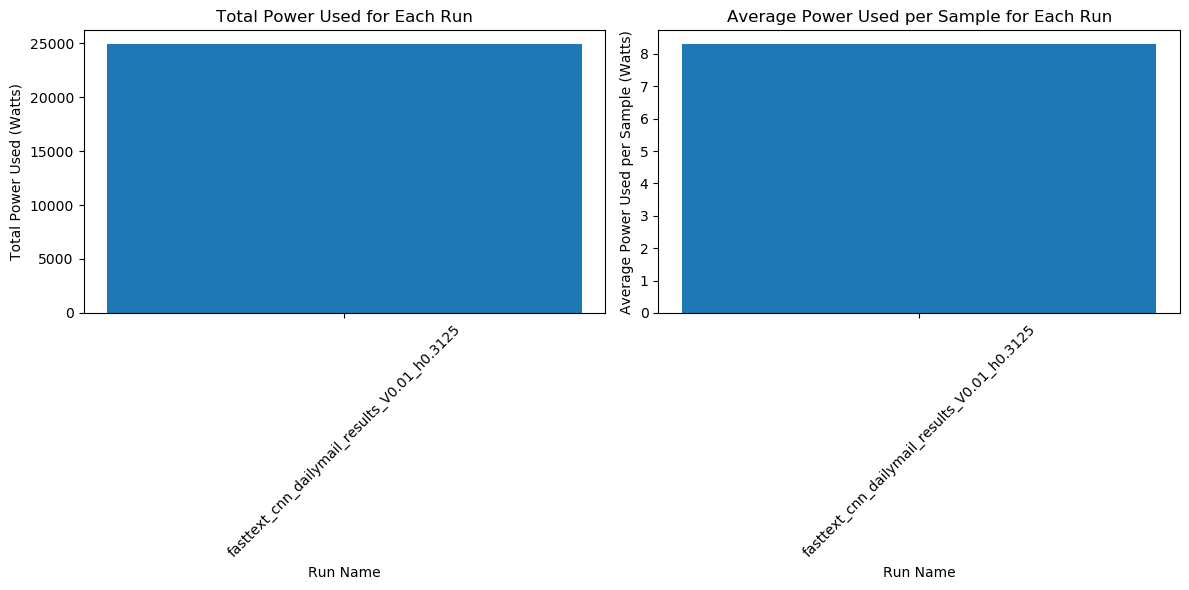

[8.314161666666667]


In [36]:
total_power = []
average_power = []
run_names = ["fasttext_cnn_dailymail_results_V0.01_h0.3125"]
num_samples = 3000

avg_power = power_run(df, run_names, total_power, average_power, num_samples)
print(avg_power)